<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [25]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
#house_csv = "../DATA/Sacramento_transactions.csv"
housing = pd.read_csv(r'C:\Users\Nour\Downloads\Sacramento_transactions.csv')
housing.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
housing.head(20)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [4]:
# ANSWER
target_variable = housing['price']
target_variable

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64

#### 2.2 List all possible variables which might be Predictor variable.

In [5]:
# ANSWER
#beds,baths,sq__ft,type,zip
housing.columns
#predictors = ["beds","baths","sq__ft","type","latitude","longitude"]
predictors = ["beds","baths","sq__ft","type","zip"]
housing_new = housing[predictors]
housing_new.head()

,beds,baths,sq__ft,type,zip
0,2,1,836,Residential,95838
1,3,1,1167,Residential,95823
2,2,1,796,Residential,95815
3,2,1,852,Residential,95815
4,2,1,797,Residential,95824


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [6]:
# ANSWER
housing_new.corr()

,beds,baths,sq__ft,zip
beds,1.000000,0.839650,0.684041,0.125319
baths,0.839650,1.000000,0.665690,0.069165
sq__ft,0.684041,0.665690,1.000000,0.130108
zip,0.125319,0.069165,0.130108,1.000000


In [7]:
housing.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [8]:
housing_predict=housing[['baths','price']]

In [9]:
housing['baths']

0      1
1      1
2      1
3      1
4      1
      ..
980    3
981    2
982    2
983    2
984    2
Name: baths, Length: 985, dtype: int64

In [10]:
housing_predict.corr()

,baths,price
baths,1.000000,0.416208
price,0.416208,1.000000


In [11]:
 np.corrcoef(housing['sq__ft'],housing['zip'] )

array([[1.        , 0.13010846],
       [0.13010846, 1.        ]])

In [12]:
predictors

['beds', 'baths', 'sq__ft', 'type', 'zip']

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [13]:
# ANSWER
predicted_price = np.mean(housing['price'])
predicted_price

234144.26395939087

In [14]:
housing_predict

,baths,price
0,1,59222
1,1,68212
2,1,68880
3,1,69307
4,1,81900
...,...,...
980,3,232425
981,2,234000
982,2,235000
983,2,235301


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

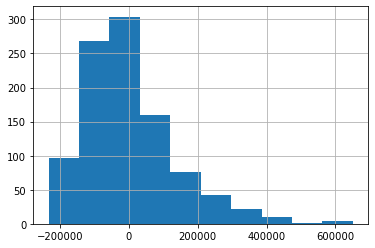

In [15]:
# ANSWER
residuals = housing['price']-predicted_price

residuals.hist()

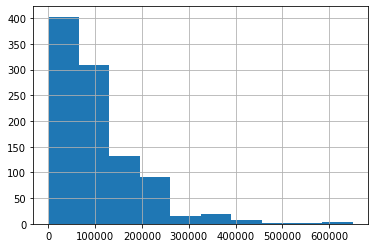

In [16]:
housing['residual'] = (housing['price']-housing['price'].mean()).abs()
housing.head(3)

housing['residual'].hist()

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [17]:
# ANSWER
x = housing["sq__ft"]
y = housing['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [18]:
# ANSWER
#beta_1 = np.cov(X,Y)[0,1]/np.var(X)
#beta_1

yres = y -np.mean(y)
xres = x -np.mean(x)

beta_1 = np.sum(yres*xres)/ np.sum(xres**2)
print(beta_1)

54.158639688530755


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [19]:
# ANSWER
beta_0 = np.mean(y)-beta_1*np.mean(x)

beta_0

162930.16140699777

In [32]:
#np.polyfit(X,Y, 1)

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [20]:
# ANSWER
Y_hat = beta_0 + beta_1*x
Y_hat 

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [21]:
# ANSWER
residuals_linear = housing['price']-Y_hat

In [22]:
#b_0, b_1 = np.polyfit(np.log(X+0.05), np.log(Y), 1)

In [23]:
#x_lim = np.array([5, 9])
#y_lim = b_0 + b_1*x_lim

#plt.plot(X,Y, linestyle='None', marker='.')
#plt.plot(x_lim, y_lim)
#plt.show()

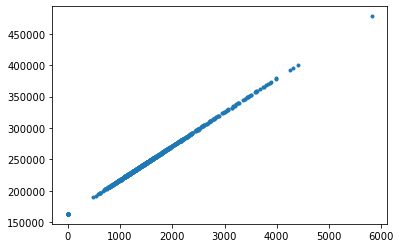

In [26]:
# ANSWER
Xsorted = np.sort(x)
ypredict = beta_0 + beta_1 * Xsorted
plt.scatter(Xsorted, ypredict, marker = ".")


##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [27]:
# ANSWER

SS_res = np.sum(residuals_linear**2)

SS_tot = np.var(housing['price'])


R_squared = 1 - SS_res/SS_tot

SS_res/SS_tot

875.1851308229275

##### 2.7.F [BONUS] Draw Plot of Predicted Line

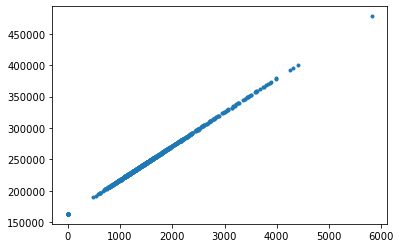

In [30]:
# ANSWER
xSort = np.sort(x)
yPredict = beta_0 +beta_1 *xSort
plt.scatter(xSort,yPredict,marker = '.')

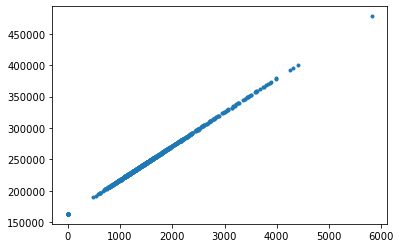

In [31]:
# ANSWER

plt.scatter(Xsorted,ypredict, marker = "." )

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

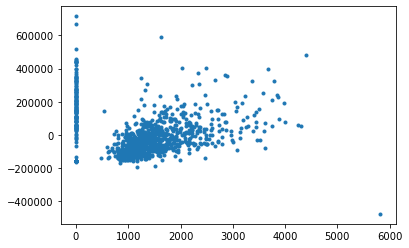

In [33]:
# ANSWER
plt.plot(x, residuals_linear, linestyle='None', marker='.')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [34]:
# ANSWER
price = beta_0 + beta_1 * 1204
price(f'Predict price for 1204 square feet{price}')

TypeError: 'numpy.float64' object is not callable

In [ ]:
from matplotlib import cm

X = predictors
y = housing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9),cmap=cmap)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



